# Linear Regression with statsmodels

This notebook covers linear regression modeling using statsmodels:

**Basic Regression**:
- **Simple Linear Regression**: One continuous predictor
- **Multiple Linear Regression**: Multiple predictors

**Handling Different Relationships**:
- **Polynomial Regression**: Nonlinear relationships
- **Log Transformations**: Multiplicative relationships

**Variable Types**:
- **Continuous Predictors**: Numerical variables
- **Categorical Predictors**: Dummy/indicator variables
- **Mixed Models**: Both continuous and categorical

**Robust Methods**:
- **Robust Regression**: Handle outliers
- **Weighted Least Squares**: Handle heteroscedasticity

Examples use simulated data, exercises use real datasets.

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Load datasets for exercises
tips = sns.load_dataset('tips')
diamonds = sns.load_dataset('diamonds')
mpg = sns.load_dataset('mpg').dropna()

print("Datasets loaded: tips, diamonds, mpg")
print(f"tips: {tips.shape[0]} rows")
print(f"diamonds: {diamonds.shape[0]} rows")
print(f"mpg: {mpg.shape[0]} rows")

Datasets loaded: tips, diamonds, mpg
tips: 244 rows
diamonds: 53940 rows
mpg: 392 rows


---
## 1. Simple Linear Regression (Continuous Predictor)

**Model**: $Y = \beta_0 + \beta_1 X + \epsilon$

Where:
- $Y$ = dependent variable (response)
- $X$ = independent variable (predictor)
- $\beta_0$ = intercept
- $\beta_1$ = slope
- $\epsilon$ = error term, $\epsilon \sim N(0, \sigma^2)$

**Interpretation**:
- $\beta_0$: Expected value of Y when X = 0
- $\beta_1$: Change in Y for a one-unit increase in X

**Example**: Predicting tip amount from total bill.

In [236]:
# Example: Simple linear regression
# Predicting tip from total_bill

# Method 1: Using formula API (recommended for clarity)
model = smf.ols('tip ~ total_bill', data=tips).fit()

print("Simple Linear Regression: tip ~ total_bill")
print("=" * 60)
print(model.summary())

Simple Linear Regression: tip ~ total_bill
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        01:14:17   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3587302789.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'r-', linewidth=2, label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')


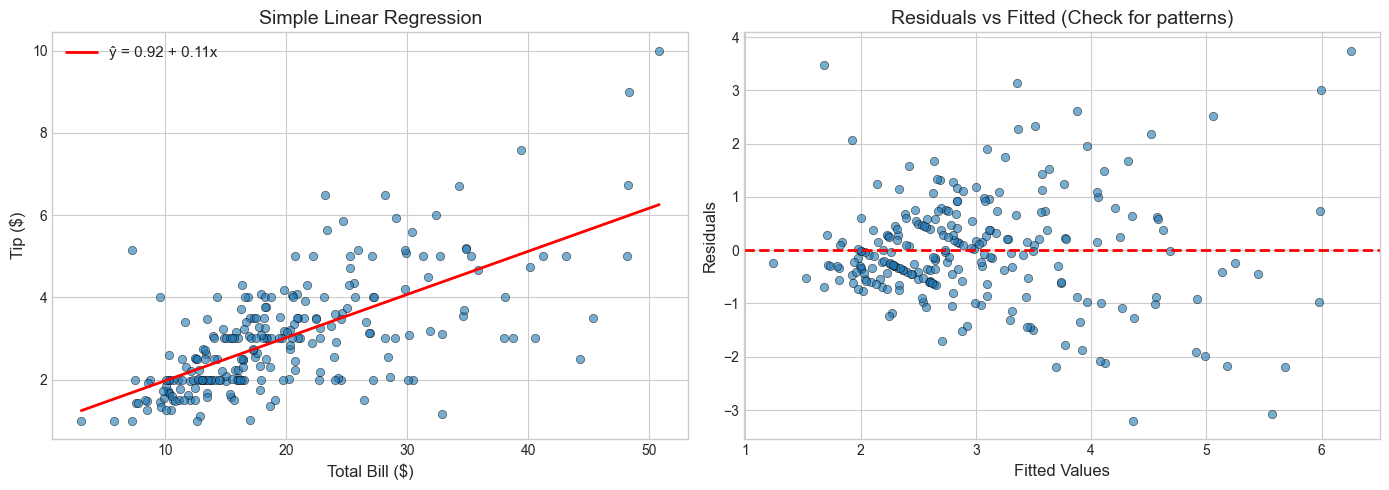


Interpretation:
• Intercept: $0.92 (expected tip when bill = $0)
• Slope: $0.11 (tip increases by $0.11 for each $1 increase in bill)
• R²: 0.457 (45.7% of variance explained)


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3587302789.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Intercept: ${model.params[0]:.2f} (expected tip when bill = $0)")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3587302789.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Slope: ${model.params[1]:.2f} (tip increases by ${model.params[1]:.2f} for each $1 increase in bill)")


In [237]:
# Visualize the regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Data with regression line
ax1 = axes[0]
ax1.scatter(tips['total_bill'], tips['tip'], alpha=0.6, edgecolor='k', linewidth=0.5)
x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
ax1.plot(x_range, model.predict(pd.DataFrame({'total_bill': x_range})), 
         'r-', linewidth=2, label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
ax1.set_xlabel('Total Bill ($)', fontsize=12)
ax1.set_ylabel('Tip ($)', fontsize=12)
ax1.set_title('Simple Linear Regression', fontsize=14)
ax1.legend(fontsize=11)

# Plot 2: Residuals vs Fitted
ax2 = axes[1]
ax2.scatter(model.fittedvalues, model.resid, alpha=0.6, edgecolor='k', linewidth=0.5)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Fitted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residuals vs Fitted (Check for patterns)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nInterpretation:")
print(f"• Intercept: ${model.params[0]:.2f} (expected tip when bill = $0)")
print(f"• Slope: ${model.params[1]:.2f} (tip increases by ${model.params[1]:.2f} for each $1 increase in bill)")
print(f"• R²: {model.rsquared:.3f} ({model.rsquared*100:.1f}% of variance explained)")

### Exercise 1: Simple Linear Regression

Use the `mpg` dataset.

**1.1** Fit a simple linear regression predicting `mpg` from `horsepower`.
- Print the model summary
- What is the R² value?
- Interpret the slope coefficient

**1.2** Create a scatter plot with the regression line.

**1.3** Is the relationship statistically significant? (Check the p-value for horsepower)

In [238]:
# Exercise 1.1: Fit mpg ~ horsepower
# YOUR CODE HERE

In [239]:
# Exercise 1.2: Scatter plot with regression line
# YOUR CODE HERE

In [240]:
# Exercise 1.3: Is the relationship significant?
# YOUR CODE HERE

---
## 2. Multiple Linear Regression

**Model**: $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$

**Interpretation**:
- Each $\beta_j$ represents the change in Y for a one-unit increase in $X_j$, **holding all other predictors constant**

**Example**: Predicting tip from total_bill and party size.

In [241]:
# Example: Multiple linear regression
model_multi = smf.ols('tip ~ total_bill + size', data=tips).fit()

print("Multiple Linear Regression: tip ~ total_bill + size")
print("=" * 60)
print(model_multi.summary())

Multiple Linear Regression: tip ~ total_bill + size
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           9.67e-34
Time:                        01:14:17   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [242]:
# Compare simple vs multiple regression
print("Model Comparison")
print("=" * 50)
print(f"{'Model':<25} {'R²':>10} {'Adj. R²':>12}")
print("-" * 50)
print(f"{'tip ~ total_bill':<25} {model.rsquared:>10.4f} {model.rsquared_adj:>12.4f}")
print(f"{'tip ~ total_bill + size':<25} {model_multi.rsquared:>10.4f} {model_multi.rsquared_adj:>12.4f}")
print("\n→ Adding 'size' improves the model slightly")

Model Comparison
Model                             R²      Adj. R²
--------------------------------------------------
tip ~ total_bill              0.4566       0.4544
tip ~ total_bill + size       0.4679       0.4635

→ Adding 'size' improves the model slightly


### Exercise 2: Multiple Linear Regression

Use the `mpg` dataset.

**2.1** Fit a multiple regression predicting `mpg` from `horsepower`, `weight`, and `acceleration`.

**2.2** Which predictors are statistically significant (p < 0.05)?

**2.3** Compare the R² of this model to the simple regression from Exercise 1. How much variance does adding more predictors explain?

In [243]:
# Exercise 2.1: Multiple regression mpg ~ horsepower + weight + acceleration
# YOUR CODE HERE

In [244]:
# Exercise 2.2 & 2.3: Analyze significance and compare R²
# YOUR CODE HERE

---
## 3. Polynomial Regression (Nonlinear Relationships)

When the relationship between X and Y is curved, we can add polynomial terms:

**Quadratic**: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

**Cubic**: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

In statsmodels formula API:
- `I(x**2)` for x squared
- `np.power(x, 2)` alternative

**Example**: Nonlinear relationship between displacement and mpg.

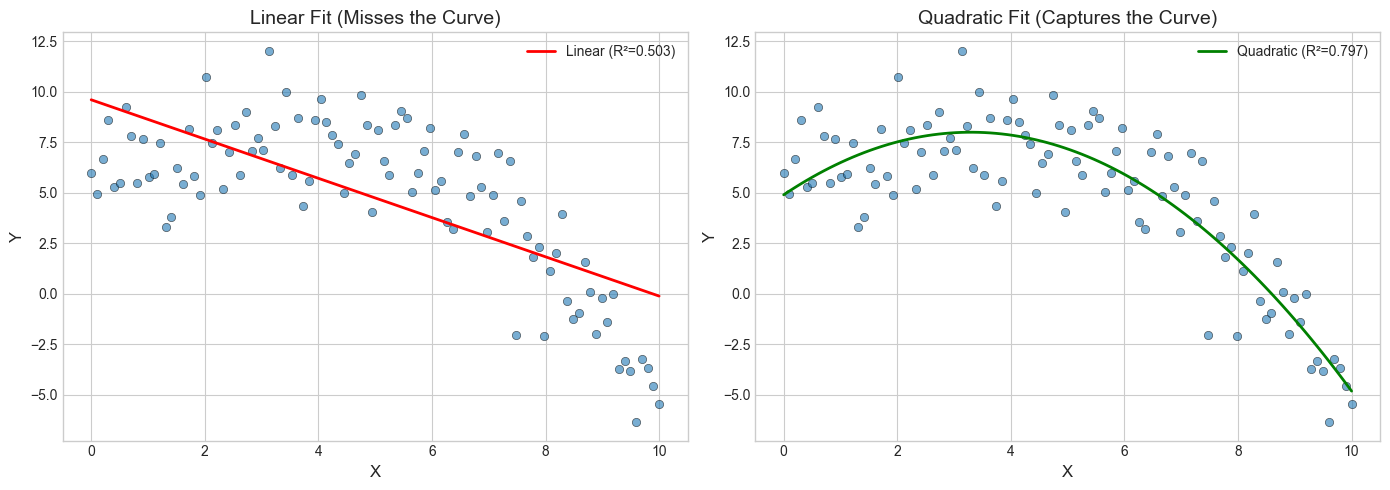


Quadratic Model Coefficients:
y = 4.90 + 1.88x + -0.285x²


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/904052340.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"y = {model_quadratic.params[0]:.2f} + {model_quadratic.params[1]:.2f}x + {model_quadratic.params[2]:.3f}x²")


In [245]:
# Create simulated nonlinear data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 5 + 2*x - 0.3*x**2 + np.random.normal(0, 2, 100)
df_nonlinear = pd.DataFrame({'x': x, 'y': y})

# Fit linear vs quadratic
model_linear = smf.ols('y ~ x', data=df_nonlinear).fit()
model_quadratic = smf.ols('y ~ x + I(x**2)', data=df_nonlinear).fit()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear fit
ax1 = axes[0]
ax1.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5)
ax1.plot(x, model_linear.fittedvalues, 'r-', linewidth=2, label=f'Linear (R²={model_linear.rsquared:.3f})')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('Linear Fit (Misses the Curve)', fontsize=14)
ax1.legend()

# Quadratic fit
ax2 = axes[1]
ax2.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5)
ax2.plot(x, model_quadratic.fittedvalues, 'g-', linewidth=2, label=f'Quadratic (R²={model_quadratic.rsquared:.3f})')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Quadratic Fit (Captures the Curve)', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

print("\nQuadratic Model Coefficients:")
print(f"y = {model_quadratic.params[0]:.2f} + {model_quadratic.params[1]:.2f}x + {model_quadratic.params[2]:.3f}x²")

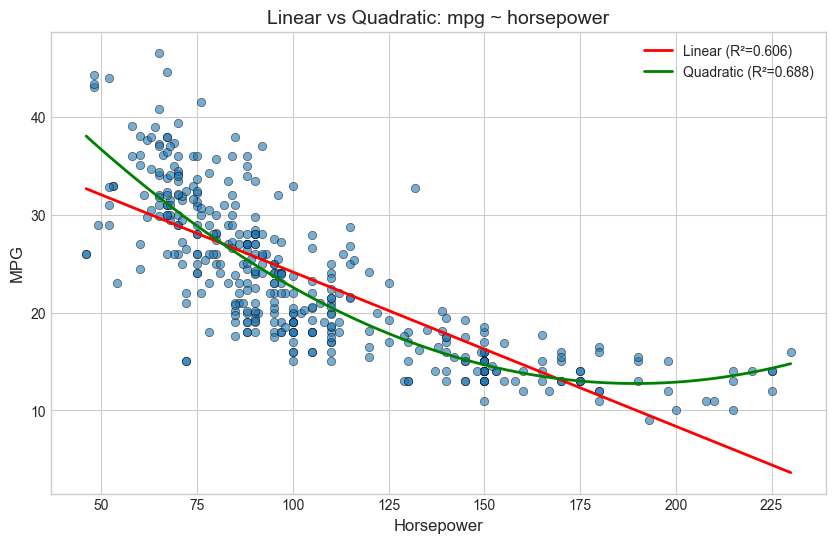

R² improvement: 0.0816


In [246]:
# Real example: mpg vs horsepower (often nonlinear)
model_hp_linear = smf.ols('mpg ~ horsepower', data=mpg).fit()
model_hp_quad = smf.ols('mpg ~ horsepower + I(horsepower**2)', data=mpg).fit()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mpg['horsepower'], mpg['mpg'], alpha=0.6, edgecolor='k', linewidth=0.5)

hp_range = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)
pred_linear = model_hp_linear.predict(pd.DataFrame({'horsepower': hp_range}))
pred_quad = model_hp_quad.predict(pd.DataFrame({'horsepower': hp_range}))

ax.plot(hp_range, pred_linear, 'r-', linewidth=2, label=f'Linear (R²={model_hp_linear.rsquared:.3f})')
ax.plot(hp_range, pred_quad, 'g-', linewidth=2, label=f'Quadratic (R²={model_hp_quad.rsquared:.3f})')
ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Linear vs Quadratic: mpg ~ horsepower', fontsize=14)
ax.legend()
plt.show()

print(f"R² improvement: {model_hp_quad.rsquared - model_hp_linear.rsquared:.4f}")

### Exercise 3: Polynomial Regression

Use the `diamonds` dataset (sample 1000 rows for speed).

**3.1** Fit a linear model: `price ~ carat`

**3.2** Fit a quadratic model: `price ~ carat + carat²`

**3.3** Compare the R² values. Which model fits better?

**3.4** Plot both fits on the same scatter plot.

In [247]:
# Sample diamonds dataset for speed
diamonds_sample = diamonds.sample(1000, random_state=42)

# Exercise 3.1 & 3.2: Fit linear and quadratic models
# YOUR CODE HERE

In [248]:
# Exercise 3.3 & 3.4: Compare R² and plot
# YOUR CODE HERE

---
## 4. Log Transformations (Multiplicative Relationships)

When the relationship is multiplicative or exponential, log transformations help:

**Log-Linear**: $\log(Y) = \beta_0 + \beta_1 X + \epsilon$
- Interpretation: 1-unit increase in X → $\beta_1 \times 100\%$ change in Y

**Log-Log**: $\log(Y) = \beta_0 + \beta_1 \log(X) + \epsilon$
- Interpretation: 1% increase in X → $\beta_1\%$ change in Y (elasticity)

**Linear-Log**: $Y = \beta_0 + \beta_1 \log(X) + \epsilon$
- Interpretation: 1% increase in X → $\beta_1 / 100$ unit change in Y

**Example**: Diamond price often has a multiplicative relationship with carat.

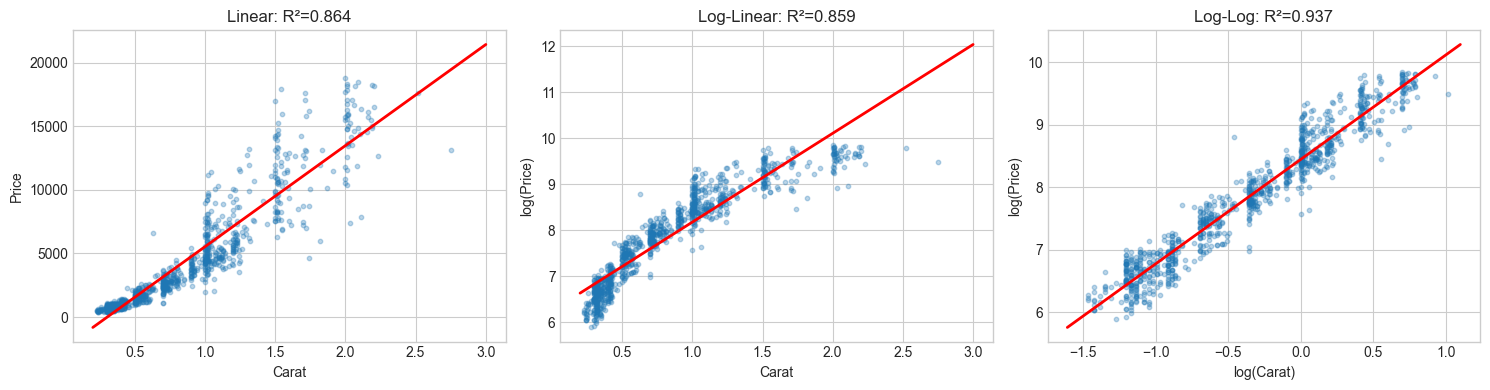


Log-Log Model Interpretation:
β₁ = 1.672
→ 1% increase in carat → 1.67% increase in price (elasticity)


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/420099299.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"β₁ = {model_log_log.params[1]:.3f}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/420099299.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"→ 1% increase in carat → {model_log_log.params[1]:.2f}% increase in price (elasticity)")


In [249]:
# Compare transformations on diamond price
diamonds_sample = diamonds.sample(1000, random_state=42)

# Different models
model_linear = smf.ols('price ~ carat', data=diamonds_sample).fit()
model_log_y = smf.ols('np.log(price) ~ carat', data=diamonds_sample).fit()
model_log_log = smf.ols('np.log(price) ~ np.log(carat)', data=diamonds_sample).fit()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear
axes[0].scatter(diamonds_sample['carat'], diamonds_sample['price'], alpha=0.3, s=10)
carat_range = np.linspace(0.2, 3, 100)
axes[0].plot(carat_range, model_linear.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Price')
axes[0].set_title(f'Linear: R²={model_linear.rsquared:.3f}')

# Log-linear
axes[1].scatter(diamonds_sample['carat'], np.log(diamonds_sample['price']), alpha=0.3, s=10)
axes[1].plot(carat_range, model_log_y.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('log(Price)')
axes[1].set_title(f'Log-Linear: R²={model_log_y.rsquared:.3f}')

# Log-log
axes[2].scatter(np.log(diamonds_sample['carat']), np.log(diamonds_sample['price']), alpha=0.3, s=10)
log_carat = np.log(carat_range)
axes[2].plot(log_carat, model_log_log.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[2].set_xlabel('log(Carat)')
axes[2].set_ylabel('log(Price)')
axes[2].set_title(f'Log-Log: R²={model_log_log.rsquared:.3f}')

plt.tight_layout()
plt.show()

print("\nLog-Log Model Interpretation:")
print(f"β₁ = {model_log_log.params[1]:.3f}")
print(f"→ 1% increase in carat → {model_log_log.params[1]:.2f}% increase in price (elasticity)")

### Exercise 4: Log Transformations

Use the `mpg` dataset.

**4.1** Fit three models predicting mpg from weight:
- Linear: `mpg ~ weight`
- Log-linear: `log(mpg) ~ weight`
- Log-log: `log(mpg) ~ log(weight)`

**4.2** Compare the R² values. Which transformation works best?

**4.3** For the best model, interpret the coefficient for weight.

In [250]:
# Exercise 4.1: Fit three models
# YOUR CODE HERE

In [251]:
# Exercise 4.2 & 4.3: Compare R² and interpret
# YOUR CODE HERE

---
## 5. Categorical Predictors

Categorical variables are automatically converted to dummy variables in statsmodels.

**Example**: For a variable `color` with levels {red, blue, green}:
- Reference category: red (or first alphabetically)
- Dummy variables: `color[T.blue]`, `color[T.green]`

**Interpretation**:
- Coefficient = difference from reference category
- Use `C()` to explicitly mark categorical variables

**Example**: Tip differences by day of week.

In [252]:
# Categorical predictor: day of week
model_day = smf.ols('tip ~ C(day)', data=tips).fit()

print("Regression with Categorical Predictor: tip ~ day")
print("=" * 60)
print(model_day.summary())

Regression with Categorical Predictor: tip ~ day
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.672
Date:                Wed, 18 Feb 2026   Prob (F-statistic):              0.174
Time:                        01:14:18   Log-Likelihood:                -422.43
No. Observations:                 244   AIC:                             852.9
Df Residuals:                     240   BIC:                             866.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [253]:
# Interpretation
print("\nInterpretation:")
print("-" * 50)
print(f"• Reference category: {tips['day'].unique()[0]} (intercept)")
print(f"• Average tip on reference day: ${model_day.params[0]:.2f}")
for param, value in model_day.params[1:].items():
    day = param.split('[T.')[1].rstrip(']')
    print(f"• {day} vs reference: ${value:+.2f} difference")


Interpretation:
--------------------------------------------------
• Reference category: Sun (intercept)
• Average tip on reference day: $2.77
• Fri vs reference: $-0.04 difference
• Sat vs reference: $+0.22 difference
• Sun vs reference: $+0.48 difference


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/2634811211.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Average tip on reference day: ${model_day.params[0]:.2f}")


In [254]:
# Change reference category
model_day_reref = smf.ols('tip ~ C(day, Treatment(reference="Sun"))', data=tips).fit()

print("\nWith Sunday as reference:")
print(model_day_reref.params)


With Sunday as reference:
Intercept                                     3.255132
C(day, Treatment(reference="Sun"))[T.Thur]   -0.483680
C(day, Treatment(reference="Sun"))[T.Fri]    -0.520395
C(day, Treatment(reference="Sun"))[T.Sat]    -0.262028
dtype: float64


### Exercise 5: Categorical Variables

Use the `mpg` dataset.

**5.1** Fit a model: `mpg ~ C(origin)` where origin is the car's country of manufacture.
- What is the reference category?
- What is the average mpg for the reference category?

**5.2** Interpret each coefficient. Which origin has the highest average mpg?

**5.3** Create a bar plot showing mean mpg by origin with error bars.

In [255]:
# Exercise 5.1: Fit mpg ~ origin
# YOUR CODE HERE

In [256]:
# Exercise 5.2 & 5.3: Interpret and visualize
# YOUR CODE HERE

---
## 6. Mixed Models (Continuous + Categorical)

Combining continuous and categorical predictors:

**Additive model**: $Y = \beta_0 + \beta_1 X + \beta_2 D + \epsilon$
- Parallel lines for different categories

**Interaction model**: $Y = \beta_0 + \beta_1 X + \beta_2 D + \beta_3 (X \times D) + \epsilon$
- Different slopes for different categories

**Syntax**:
- `y ~ x + C(cat)` → additive
- `y ~ x * C(cat)` → interaction (includes main effects)
- `y ~ x:C(cat)` → interaction only (no main effects)

In [257]:
# Additive model: tip ~ total_bill + smoker
model_additive = smf.ols('tip ~ total_bill + C(smoker)', data=tips).fit()

# Interaction model: tip ~ total_bill * smoker
model_interaction = smf.ols('tip ~ total_bill * C(smoker)', data=tips).fit()

print("Additive Model: tip ~ total_bill + smoker")
print(model_additive.params)
print(f"\nR² = {model_additive.rsquared:.4f}")

print("\n" + "=" * 50)
print("\nInteraction Model: tip ~ total_bill * smoker")
print(model_interaction.params)
print(f"\nR² = {model_interaction.rsquared:.4f}")

Additive Model: tip ~ total_bill + smoker
Intercept          0.814299
C(smoker)[T.No]    0.148924
total_bill         0.105722
dtype: float64

R² = 0.4593


Interaction Model: tip ~ total_bill * smoker
Intercept                     1.564271
C(smoker)[T.No]              -1.204203
total_bill                    0.069590
total_bill:C(smoker)[T.No]    0.067566
dtype: float64

R² = 0.5060


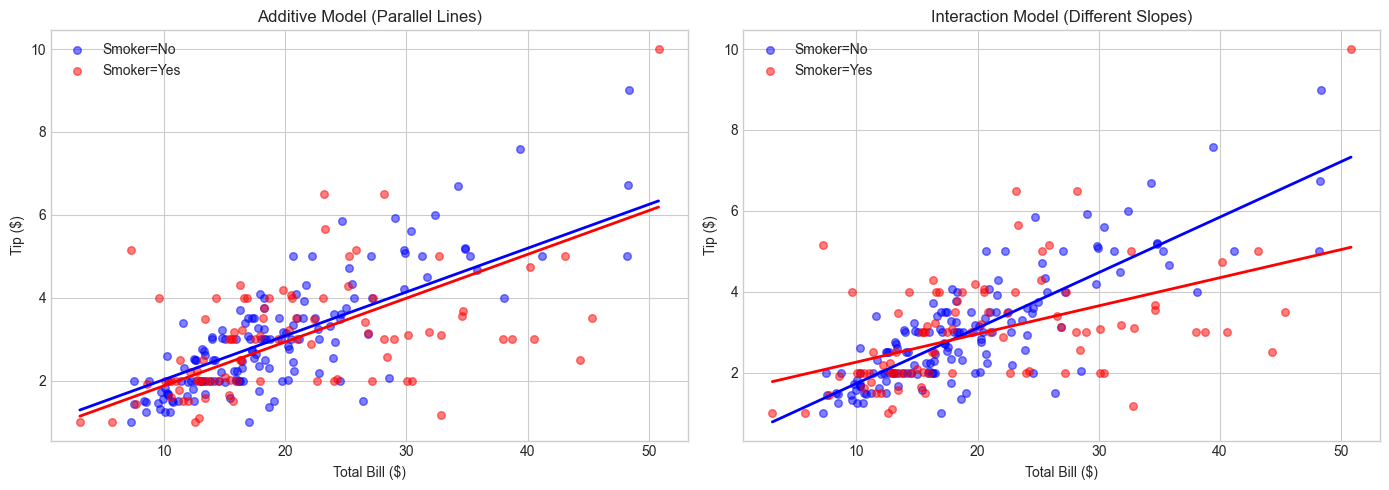

In [258]:
# Visualize both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = {'No': 'blue', 'Yes': 'red'}
bill_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)

# Additive model (parallel lines)
ax1 = axes[0]
for smoker in ['No', 'Yes']:
    subset = tips[tips['smoker'] == smoker]
    ax1.scatter(subset['total_bill'], subset['tip'], alpha=0.5, 
                c=colors[smoker], label=f'Smoker={smoker}', s=30)
    
    pred_df = pd.DataFrame({'total_bill': bill_range, 'smoker': smoker})
    ax1.plot(bill_range, model_additive.predict(pred_df), 
             c=colors[smoker], linewidth=2)

ax1.set_xlabel('Total Bill ($)')
ax1.set_ylabel('Tip ($)')
ax1.set_title('Additive Model (Parallel Lines)', fontsize=12)
ax1.legend()

# Interaction model (different slopes)
ax2 = axes[1]
for smoker in ['No', 'Yes']:
    subset = tips[tips['smoker'] == smoker]
    ax2.scatter(subset['total_bill'], subset['tip'], alpha=0.5, 
                c=colors[smoker], label=f'Smoker={smoker}', s=30)
    
    pred_df = pd.DataFrame({'total_bill': bill_range, 'smoker': smoker})
    ax2.plot(bill_range, model_interaction.predict(pred_df), 
             c=colors[smoker], linewidth=2)

ax2.set_xlabel('Total Bill ($)')
ax2.set_ylabel('Tip ($)')
ax2.set_title('Interaction Model (Different Slopes)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

### Exercise 6: Mixed Models

Use the `mpg` dataset.

**6.1** Fit an additive model: `mpg ~ horsepower + C(origin)`

**6.2** Fit an interaction model: `mpg ~ horsepower * C(origin)`

**6.3** Is the interaction significant? Compare the models using R² and check the interaction p-values.

**6.4** Create a plot showing the regression lines for each origin.

In [259]:
# Exercise 6.1 & 6.2: Fit additive and interaction models
# YOUR CODE HERE

In [260]:
# Exercise 6.3 & 6.4: Compare models and visualize
# YOUR CODE HERE

---
## 7. Robust Regression

Standard OLS is sensitive to outliers. Robust regression methods downweight outliers:

**Methods in statsmodels**:
- `RLM` (Robust Linear Model) with M-estimators
- Huber's T norm (default): downweights but doesn't fully ignore outliers
- Tukey's bisquare: can completely ignore extreme outliers

**When to use**:
- Data has outliers you want to be robust against
- Residuals have heavy tails
- You suspect influential observations

In [261]:
# Create data with outliers
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
y = 2 + 1.5 * x + np.random.normal(0, 1, n)

# Add outliers
outlier_idx = [10, 25, 50, 75, 90]
y[outlier_idx] = y[outlier_idx] + np.array([-15, -12, 18, 15, 50])

df_outliers = pd.DataFrame({'x': x, 'y': y})

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x, model_ols.fittedvalues, 'b-', linewidth=2, label=f'OLS: y = {model_ols.params[0]:.2f} + {model_ols.params[1]:.2f}x')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x, model_rlm.fittedvalues, 'g--', linewidth=2, label=f'Huber: y = {model_rlm.params[0]:.2f} + {model_rlm.params[1]:.2f}x')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:13: FutureWarning: Series.__

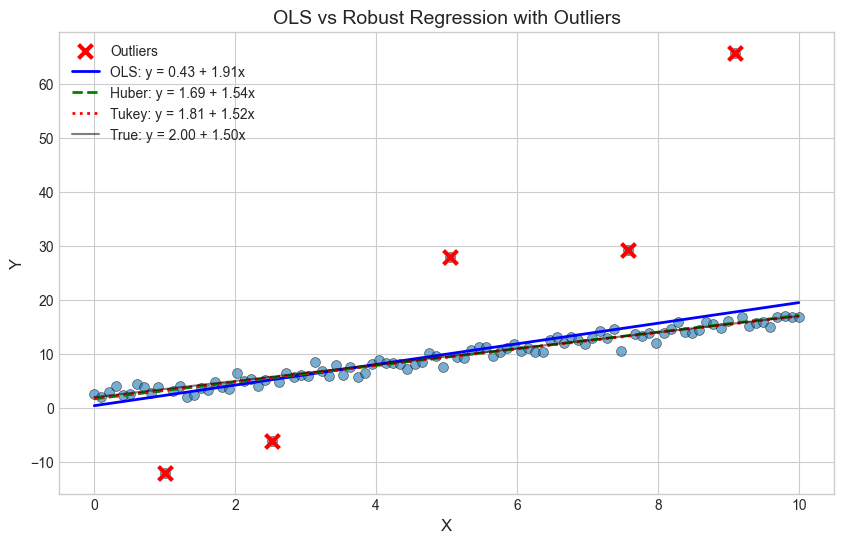

Model Comparison:
Method           Intercept      Slope            True
--------------------------------------------------
OLS                  0.425      1.906        (biased)
Huber                1.693      1.542                
Tukey                1.814      1.516                
True                 2.000      1.500                


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'OLS':<15} {model_ols.params[0]:>10.3f} {model_ols.params[1]:>10.3f} {'(biased)':>15}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Huber':<15} {model_rlm.params[0]:>10.3f} {model_rlm.params[1]:>10.3f} {'':>15}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/3050839518.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

In [262]:
# Compare OLS vs Robust Regression
model_ols = smf.ols('y ~ x', data=df_outliers).fit()
model_rlm = smf.rlm('y ~ x', data=df_outliers, M=sm.robust.norms.HuberT()).fit()
model_tukey = smf.rlm('y ~ x', data=df_outliers, M=sm.robust.norms.TukeyBiweight()).fit()

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5, s=50)
ax.scatter(x[outlier_idx], y[outlier_idx], c='red', s=100, marker='x', linewidths=3, label='Outliers')

ax.plot(x, model_ols.fittedvalues, 'b-', linewidth=2, label=f'OLS: y = {model_ols.params[0]:.2f} + {model_ols.params[1]:.2f}x')
ax.plot(x, model_rlm.fittedvalues, 'g--', linewidth=2, label=f'Huber: y = {model_rlm.params[0]:.2f} + {model_rlm.params[1]:.2f}x')
ax.plot(x, model_tukey.fittedvalues, 'r:', linewidth=2, label=f'Tukey: y = {model_tukey.params[0]:.2f} + {model_tukey.params[1]:.2f}x')

# True line
ax.plot(x, 2 + 1.5*x, 'k-', linewidth=1.5, alpha=0.5, label='True: y = 2.00 + 1.50x')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('OLS vs Robust Regression with Outliers', fontsize=14)
ax.legend()
plt.show()

print("Model Comparison:")
print(f"{'Method':<15} {'Intercept':>10} {'Slope':>10} {'True':>15}")
print("-" * 50)
print(f"{'OLS':<15} {model_ols.params[0]:>10.3f} {model_ols.params[1]:>10.3f} {'(biased)':>15}")
print(f"{'Huber':<15} {model_rlm.params[0]:>10.3f} {model_rlm.params[1]:>10.3f} {'':>15}")
print(f"{'Tukey':<15} {model_tukey.params[0]:>10.3f} {model_tukey.params[1]:>10.3f} {'':>15}")
print(f"{'True':<15} {2.0:>10.3f} {1.5:>10.3f} {'':>15}")

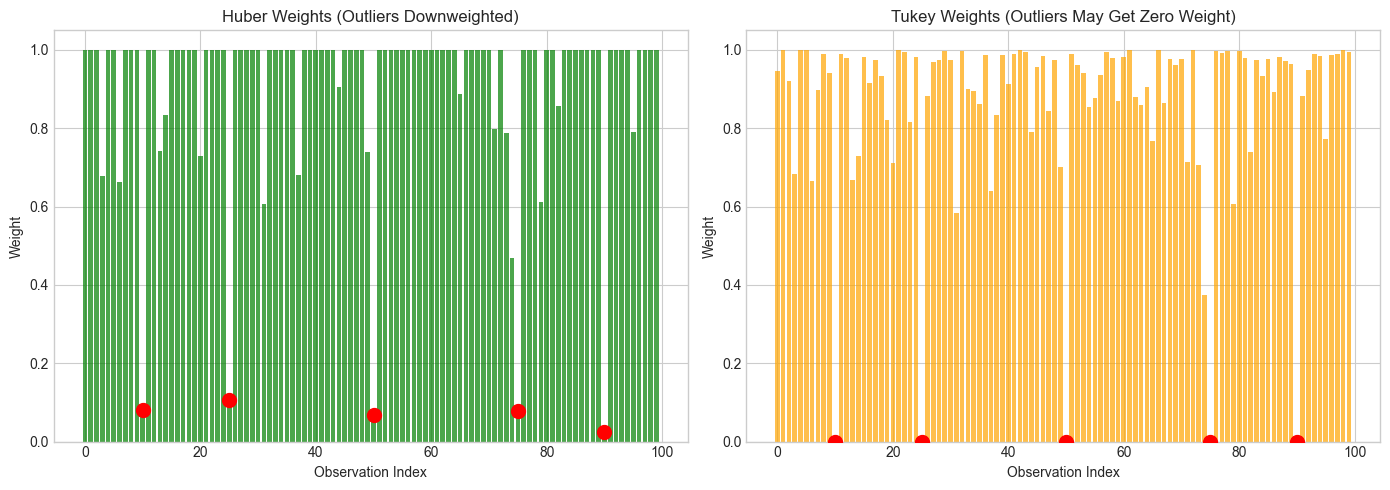


Outlier weights (indices [10, 25, 50, 75, 90]):
Huber: 10    0.081
25    0.105
50    0.067
75    0.078
90    0.025
dtype: float64
Tukey: 10    0.0
25    0.0
50    0.0
75    0.0
90    0.0
dtype: float64


In [263]:
# Examine weights assigned to observations
weights_huber = model_rlm.weights
weights_tukey = model_tukey.weights

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.bar(range(n), weights_huber, color='green', alpha=0.7)
ax1.scatter(outlier_idx, weights_huber[outlier_idx], c='red', s=100, zorder=5)
ax1.set_xlabel('Observation Index')
ax1.set_ylabel('Weight')
ax1.set_title('Huber Weights (Outliers Downweighted)', fontsize=12)

ax2 = axes[1]
ax2.bar(range(n), weights_tukey, color='orange', alpha=0.7)
ax2.scatter(outlier_idx, weights_tukey[outlier_idx], c='red', s=100, zorder=5)
ax2.set_xlabel('Observation Index')
ax2.set_ylabel('Weight')
ax2.set_title('Tukey Weights (Outliers May Get Zero Weight)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nOutlier weights (indices {outlier_idx}):")
print(f"Huber: {weights_huber[outlier_idx].round(3)}")
print(f"Tukey: {weights_tukey[outlier_idx].round(3)}")

### Exercise 7: Robust Regression

We'll create a modified tips dataset with extreme outliers to clearly demonstrate the difference between OLS and robust regression.

**7.1** Run the cell below to create `tips_outliers` - the tips dataset with 5 extreme outliers added. Plot the data.

**7.2** Fit three models predicting tip from total_bill:
- Standard OLS
- Robust regression with Huber norm
- Robust regression with Tukey bisquare

**7.3** Compare the coefficients. How much do they differ? Which method is closest to the original (no outliers) relationship?

**7.4** Plot all three regression lines on the same scatter plot. Mark the outliers clearly.

In [264]:
# Exercise 7.1: Create tips dataset with extreme outliers
# First, fit model on CLEAN data to know the "true" relationship
model_clean = smf.ols('tip ~ total_bill', data=tips).fit()
print(f"Original clean data: tip = {model_clean.params[0]:.3f} + {model_clean.params[1]:.3f} * total_bill")
print(f"This is the 'true' relationship we want robust regression to recover.")

# Create modified dataset with extreme outliers
tips_outliers = tips.copy()
np.random.seed(42)

# Add 5 extreme outliers: high bills with very low tips OR low bills with very high tips
outlier_indices = [10, 50, 100, 150, 200]
tips_outliers.loc[outlier_indices[0], ['total_bill', 'tip']] = [45, 1]   # High bill, tiny tip
tips_outliers.loc[outlier_indices[1], ['total_bill', 'tip']] = [50, 2]   # High bill, tiny tip
tips_outliers.loc[outlier_indices[2], ['total_bill', 'tip']] = [8, 12]   # Low bill, huge tip
tips_outliers.loc[outlier_indices[3], ['total_bill', 'tip']] = [40, 1.5] # High bill, tiny tip
tips_outliers.loc[outlier_indices[4], ['total_bill', 'tip']] = [10, 15]  # Low bill, huge tip

print(f"\nAdded 5 extreme outliers at indices: {outlier_indices}")

# YOUR CODE HERE - Plot tips_outliers and mark the outliers

Original clean data: tip = 0.920 + 0.105 * total_bill
This is the 'true' relationship we want robust regression to recover.

Added 5 extreme outliers at indices: [10, 50, 100, 150, 200]


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_50329/519633981.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Original clean data: tip = {model_clean.params[0]:.3f} + {model_clean.params[1]:.3f} * total_bill")


In [265]:
# Exercise 7.2: Fit OLS and robust models
# YOUR CODE HERE

In [266]:
# Exercise 7.3 & 7.4: Compare coefficients and plot
# YOUR CODE HERE

---
## 8. Model Diagnostics

Always check regression assumptions:

1. **Linearity**: Residuals vs Fitted should show no pattern
2. **Normality**: Q-Q plot of residuals should be approximately linear
3. **Homoscedasticity**: Residuals should have constant variance
4. **Independence**: Residuals should not be correlated (for time series)

**Example**: Diagnostic plots for a regression model.

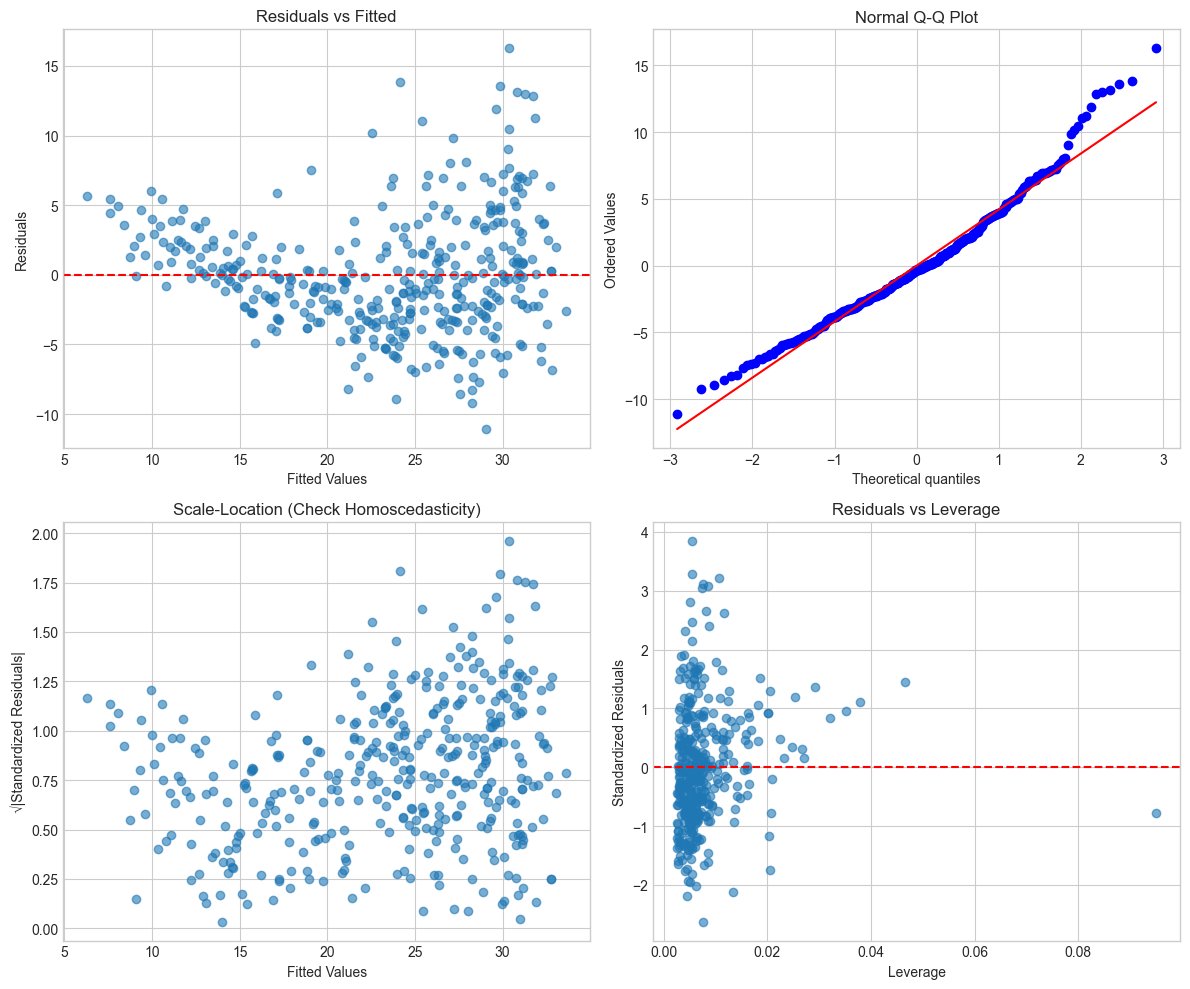

In [267]:
# Fit a model for diagnostics
model = smf.ols('mpg ~ horsepower + weight', data=mpg).fit()

# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted
ax1 = axes[0, 0]
ax1.scatter(model.fittedvalues, model.resid, alpha=0.6)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(model.resid, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot')

# 3. Scale-Location (sqrt of standardized residuals vs fitted)
ax3 = axes[1, 0]
standardized_resid = model.get_influence().resid_studentized_internal
ax3.scatter(model.fittedvalues, np.sqrt(np.abs(standardized_resid)), alpha=0.6)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('√|Standardized Residuals|')
ax3.set_title('Scale-Location (Check Homoscedasticity)')

# 4. Residuals vs Leverage
ax4 = axes[1, 1]
influence = model.get_influence()
leverage = influence.hat_matrix_diag
ax4.scatter(leverage, standardized_resid, alpha=0.6)
ax4.axhline(0, color='red', linestyle='--')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Standardized Residuals')
ax4.set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

### Exercise 8: Model Diagnostics

Use the `diamonds_sample` dataset (1000 rows).

**8.1** Fit a linear model: `price ~ carat + depth + table`

**8.2** Create the four diagnostic plots:
- Residuals vs Fitted
- Q-Q plot of residuals
- Scale-Location plot
- Residuals vs Leverage

**8.3** Based on the diagnostics, are the assumptions met? What improvements might help?

In [268]:
# Exercise 8.1: Fit model
diamonds_sample = diamonds.sample(1000, random_state=42)
# YOUR CODE HERE

In [269]:
# Exercise 8.2 & 8.3: Diagnostic plots and interpretation
# YOUR CODE HERE

---
## 9. Choosing the Right Model

| Situation | Recommended Approach |
|-----------|---------------------|
| Linear relationship | Standard OLS |
| Curved relationship | Polynomial or log transformation |
| Multiplicative relationship | Log-log model |
| Categorical predictors | Use `C(variable)` |
| Different slopes by group | Include interaction terms |
| Outliers present | Robust regression (RLM) |
| Non-constant variance | Weighted LS or robust regression |
| Multiple predictors | Check for multicollinearity (VIF) |

In [270]:
print("KEY TAKEAWAYS")
print("=" * 60)
print()
print("1. LINEAR REGRESSION BASICS:")
print("   • Use smf.ols('y ~ x', data=df) for formula interface")
print("   • Check R² for model fit, p-values for significance")
print()
print("2. NONLINEAR RELATIONSHIPS:")
print("   • Add polynomial terms: I(x**2), I(x**3)")
print("   • Use log transformations: np.log(x)")
print()
print("3. CATEGORICAL VARIABLES:")
print("   • Mark explicitly with C(variable)")
print("   • Interpret coefficients as differences from reference")
print()
print("4. INTERACTIONS:")
print("   • Use * for full interaction (main + interaction)")
print("   • Use : for interaction only")
print()
print("5. ROBUST REGRESSION:")
print("   • Use smf.rlm() when outliers are present")
print("   • Huber is mild, Tukey is aggressive")
print()
print("6. ALWAYS CHECK DIAGNOSTICS:")
print("   • Residual plots for patterns")
print("   • Q-Q plot for normality")
print("   • Consider transformations if assumptions violated")

KEY TAKEAWAYS

1. LINEAR REGRESSION BASICS:
   • Use smf.ols('y ~ x', data=df) for formula interface
   • Check R² for model fit, p-values for significance

2. NONLINEAR RELATIONSHIPS:
   • Add polynomial terms: I(x**2), I(x**3)
   • Use log transformations: np.log(x)

3. CATEGORICAL VARIABLES:
   • Mark explicitly with C(variable)
   • Interpret coefficients as differences from reference

4. INTERACTIONS:
   • Use * for full interaction (main + interaction)
   • Use : for interaction only

5. ROBUST REGRESSION:
   • Use smf.rlm() when outliers are present
   • Huber is mild, Tukey is aggressive

6. ALWAYS CHECK DIAGNOSTICS:
   • Residual plots for patterns
   • Q-Q plot for normality
   • Consider transformations if assumptions violated
